In [58]:
from keras.preprocessing.image import load_img
import warnings
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt    

# load the image via load_img function
img = load_img('Data/train_set/01/26_01_22_01_196.png')
img2 = load_img('Data/train_set/01/26_01_22_01_197.png')
img3 = load_img('Data/train_set/01/26_01_22_01_195.png')
img_ano = load_img('Data/train_set/ano/17_11_21_anomalies_006.png')
 
# convert the given image into  numpy array
img_numpy_array = img_to_array(img)
img2_numpy_array = img_to_array(img2)
img3_numpy_array = img_to_array(img3)#_ano)

# mean template
template  = np.mean( np.array([ img_numpy_array, img2_numpy_array, img3_numpy_array]), axis=0)
img_pil_from_numpy_template = array_to_img(template)

# Look for difference
diff_array = img_numpy_array_ano - template #_ano

  
# convert back to image
img_pil_from_numpy_array = array_to_img(diff_array)
  

NameError: name 'img_numpy_array_ano' is not defined

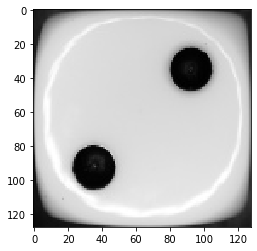

In [90]:
img_pil_from_numpy_diff_array = array_to_img(diff_array)

# plt.imshow(img_pil_from_numpy_diff_array)
plt.imshow(img_pil_from_numpy_template)

In [18]:
img_numpy_array.flatten()


array([28., 28., 28., ..., 30., 30., 30.], dtype=float32)

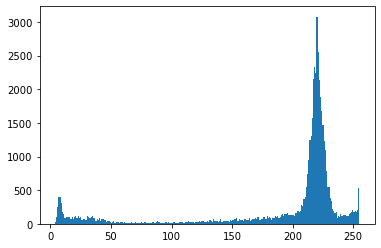

In [98]:
# image = img_as_float(img)
# bin_counts, bin_edges, patches = plt.hist(img_numpy_array.ravel(), 256)
# bin_counts, bin_edges, patches = plt.hist(img2_numpy_array.ravel(), 256)
# bin_counts, bin_edges, patches = plt.hist(img3_numpy_array.ravel(), 256)

bin_counts, bin_edges, patches = plt.hist(template.ravel(), 256)
# bin_counts, bin_edges, patches = plt.hist(diff_array.ravel(), 20)

In [48]:
def extract_feature(file_name: str) -> tuple:
    
    bin_counts, bin_edges = np.histogram(img, 20)
    return bin_counts, bin_edges

In [4]:
# import time
import os
import numpy as np
import glob
#Automated extraction of features for one folder
# start_time = timer()
features = []
imgs_numpy_array = []
path = 'Data/train_set/01/'
for root, dirs, files in glob.glob(path + '*.png'): #os.walk(path, topdown = True):
    for name in files:
# for file in glob.glob('Data/train_set/*'):
    # print(name)
    # file = path + name
        print(file)
        img = load_img(file)
        img_numpy_array = img_to_array(img)
        imgs_numpy_array.append(img_numpy_array)
        bin_counts, bin_edges = extract_feature(img_numpy_array.flatten())
        features.append([file, bin_counts, bin_edges])
# print('time to extract features: {:.3f}sec'.format((end_time-start_time)/60))
# features

ValueError: too many values to unpack (expected 3)

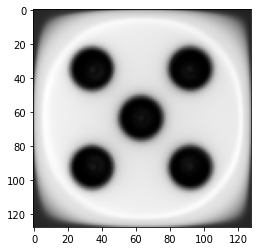

In [60]:
#Code Creates Templates

from keras.preprocessing.image import load_img, save_img
import warnings
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt   
import os
import numpy as np
# from pathlib import Path
imgs_numpy_array =[]
path = 'Data/train_set/06/'

for dirpath, dirs, files in os.walk(path, topdown = True): 
    for filename in files:
        fname = os.path.join(dirpath,filename)
        if fname.endswith('.png'):
            img = load_img(fname) #Load the image
            img_numpy_array = img_to_array(img) # convert the given image into  numpy array
            imgs_numpy_array.append(img_numpy_array) #concatenate the arrays 

# take pixle by pixle value averages to create the template
template = np.mean(imgs_numpy_array, axis=0)

#convert the numpy array back to image 
img_pil_from_numpy_template = array_to_img(template)
img_pil_from_numpy_template

    # plt.imshow(img_pil_from_numpy_diff_array)
# templates(path)
plt.imshow(img_pil_from_numpy_template)
save_img('template_06.png', template)

NameError: name 'save_img' is not defined

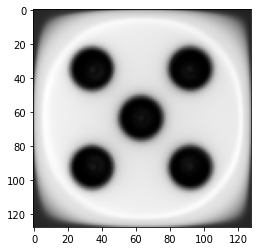

In [57]:
path = 'Data/train_set/06/'
imgs_numpy_array =[]
for dirpath, dirs, files in os.walk(path, topdown = True): 
    for filename in files:
        fname = os.path.join(dirpath,filename)
        if fname.endswith('.png'):
            img = load_img(fname) #Load the image
            img_numpy_array = img_to_array(img) # convert the given image into  numpy array
            imgs_numpy_array.append(img_numpy_array) #concatenate the arrays 

# take pixle by pixle value averages to create the template
template = np.mean(imgs_numpy_array, axis=0)

#convert the numpy array back to image 
img_pil_from_numpy_template = array_to_img(template)
img_pil_from_numpy_template

    # plt.imshow(img_pil_from_numpy_diff_array)
# templates(path)
plt.imshow(img_pil_from_numpy_template)
save_img('template_06.png', template)

In [124]:
# !pip install image_similarity_measures
import image_similarity_measures
# from image_similarity_measures.quality_metrics import rmse, ssim, sre
# from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp

from collections import Counter
img_ano = load_img('Data/train_set/ano/17_11_21_anomalies_061.png')

 
# convert the given image into  numpy array
img_ano_numpy_array = img_to_array(img_ano)
img_pil_from_numpy_template = array_to_img(img_ano_numpy_array)


flat_array_ano = img_ano_numpy_array.flatten()
# flat_array_template = template.flatten()

RH1 = Counter(flat_array_ano)
H1 = []
for i in range(256):
    if i in RH1.keys():
        H1.append(RH1[i])
    else:
        H1.append(0)

ModuleNotFoundError: No module named 'image_similarity_measures'

In [122]:
import os
H0s = []
path = 'Data/templates/'
for filename in os.listdir(path): #, topdown = True):
    f = os.path.join(path, filename)
    if f.endswith('.png'):
        print(f)
        img_template = load_img(f) #Load the image
        flat_array_template = img_to_array(img_template).flatten() # convert the given image into  flattened numpy array
        RH0 = Counter(flat_array_template)
        H0 = []
        for i in range(256):
            if i in RH0.keys():
                H0.append(RH0[i])
            else:
                H0.append(0)
        H0s.append([f, H0])
len(H0s)        
   

#Euclidean Distance Function        
def L2Norm(H1,H2):
    distance =0
    for i in range(len(H1)):
        distance += np.square(H1[i]-H2[i])
    return np.sqrt(distance)

# ssim_measures[img_path]= ssim(img_pil_from_numpy_template, img_pil_from_numpy_template)

Data/templates/template_09.png
Data/templates/template_01.png
Data/templates/template_08.png
Data/templates/template_04.png
Data/templates/template_00.png
Data/templates/template_10.png
Data/templates/template_06.png
Data/templates/template_07.png
Data/templates/template_05.png
Data/templates/template_02.png
Data/templates/template_03.png


In [123]:
import numpy as np
dist =[]
for i in range(len(H0s)):
    name  = H0s[i][0]
    H2  = H0s[i][1]
    # print(name)
    # print(H0)
    dist_test_ref_1 = L2Norm(H1, H2)
    print(f"The distance between {name} and Test Image is : {dist_test_ref_1}") #format(dist_test_ref_1))
    dist.append(dist_test_ref_1)
    
min(dist)


The distance between Data/templates/template_09.png and Test Image is : 5595.010455754305
The distance between Data/templates/template_01.png and Test Image is : 8179.566981203834
The distance between Data/templates/template_08.png and Test Image is : 5880.1301006015165
The distance between Data/templates/template_04.png and Test Image is : 6782.06119111292
The distance between Data/templates/template_00.png and Test Image is : 8411.698282748854
The distance between Data/templates/template_10.png and Test Image is : 5773.722715891368
The distance between Data/templates/template_06.png and Test Image is : 5304.195132157187
The distance between Data/templates/template_07.png and Test Image is : 5915.385363609035
The distance between Data/templates/template_05.png and Test Image is : 7042.646803581733
The distance between Data/templates/template_02.png and Test Image is : 9401.283954864888
The distance between Data/templates/template_03.png and Test Image is : 6511.769344809442


5304.195132157187

In [4]:
def templates(path):
    imgs_numpy_array =[]
    for dirpath, dirs, files in os.walk(path, topdown = True): 
        for filename in files:
            fname = os.path.join(dirpath,filename)
            if fname.endswith('.png'):
                img = load_img(fname) #Load the image
                img_numpy_array = img_to_array(img) # convert the given image into  numpy array
                imgs_numpy_array.append(img_numpy_array) #concatenate the arrays 

    # take pixle by pixle value averages to create the template
    template = np.mean(imgs_numpy_array, axis=0)

    #convert the numpy array back to image 
    img_pil_from_numpy_template = array_to_img(template)
    return img_pil_from_numpy_template

In [117]:
# import required module
import os
# assign directory
directory = 'Data/templates/'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        # print(f)

SyntaxError: unexpected EOF while parsing (1229064791.py, line 12)

In [131]:
import scipy.spatial.distance as dist
import cv2
img_ano = cv2.imread('Data/train_set/ano/17_11_21_anomalies_061.png')
template = cv2.imread('Data/templates/template_09.png')

In [132]:
import os
H0s = []
path = 'Data/templates/'
for filename in os.listdir(path): #, topdown = True):
    f = os.path.join(path, filename)
    if f.endswith('.png'):
        print(f)
        img_template = load_img(f) #Load the image

dist.euclidean(img_ano.flatten(), template.flatten())

41196.71139787738